<h1>Longliner Logistic Regression Model</h1>

<h2>Import Modules</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import model_selection
import pylab as pl

<h2>Data Pre-Processing</h2>

In [2]:
#Load all the data into numpy arrays
longliner_data = np.load('../datasets/measures/kristina_longliner.measures.npz')

#Move _data['x'][:] into _x[:]
longliner_data = longliner_data['x']

#Convert into Pandas data frame
longliner_data = pd.DataFrame(longliner_data)

In [3]:
#drop unknown fishing points
longliner_data['classification'].astype(int)
longliner_data = longliner_data[longliner_data['classification'] != -1]

#drop duplicate rows
longliner_data.drop_duplicates()

,measure_coursestddev_1800_log,measure_courseavg_43200,course,measure_sin_course,measure_daylightavg_900,measure_speedstddev_10800,speed,measure_pos_86400,measure_daylightavg_43200,measure_latavg_86400,...,measure_speedavg_21600,measure_count_900,measure_speedstddev_86400_log,measure_lonavg_10800,measure_speedstddev_10800_log,lat,measure_speedstddev_43200_log,measure_pos_21600,measure_speedstddev_900_log,measure_speedstddev_1800_log
854,-2.999977,0.690903,162.800003,0.209097,1.0,1.176472e-02,8.2,0.338336,1.0,18.298490,...,0.561765,2.0,-0.747016,-17.232808,-1.893989,18.608902,-1.240346,0.140194,-3.000000,-3.000000
1050,-2.999963,0.512222,333.899994,-0.311084,1.0,1.940014e-07,5.0,0.199343,0.0,18.836199,...,0.705882,2.0,-1.151955,-19.453779,-2.999916,18.839836,-1.345654,0.000004,-3.000000,-3.000000
1346,-2.999956,0.408403,260.100006,-0.696577,1.0,2.161953e-07,0.7,0.147518,0.0,19.114820,...,0.755882,2.0,-0.857243,-17.323196,-2.999906,19.276720,-0.770643,0.119654,-3.000000,-3.000000
1494,-2.999980,0.292407,43.400002,0.485844,0.0,4.117647e-02,4.2,0.136131,0.0,18.843011,...,0.814706,2.0,-0.842503,-17.240740,-1.374930,18.852455,-0.813027,0.039236,-3.000000,-3.000000
1572,-2.999966,0.566840,333.500000,-0.315509,0.0,1.794118e-01,7.0,0.300928,0.0,19.152946,...,0.851471,2.0,-0.681062,-17.113824,-0.743735,19.101482,-0.687904,0.087685,-3.000000,-3.000000
1704,-2.999972,0.660185,204.600006,-0.294355,1.0,1.303319e-07,9.0,0.221293,1.0,20.413910,...,0.549020,2.0,-1.191678,-19.248117,-2.999943,20.195805,-1.248264,0.265323,-3.000000,-3.000000
1706,-2.999973,0.634792,201.100006,-0.254556,1.0,2.352942e-02,8.2,0.274425,1.0,20.382391,...,0.494118,2.0,-1.259062,-19.301900,-1.610313,19.944584,-1.293168,0.136640,-3.000000,-3.000000
2200,-1.203229,0.516907,94.800003,0.704627,1.0,3.494632e-08,0.0,0.451451,0.0,28.249069,...,1.000000,2.0,-0.638457,-15.420208,-2.999985,28.142187,-0.660933,0.000037,-3.000000,-3.000000
2324,-2.999954,0.683426,253.300003,-0.677283,0.0,1.357560e-07,4.6,0.921144,0.0,23.979268,...,0.688235,2.0,-1.057741,-22.972507,-2.999941,23.409361,-1.263738,0.321997,-3.000000,-3.000000
2340,-2.999984,0.486722,110.000000,0.664463,1.0,1.129936e-07,7.5,0.340167,0.0,23.393317,...,0.627451,2.0,-0.787696,-23.916439,-2.999951,23.424232,-0.824801,0.202535,-3.000000,-3.000000


In [4]:
# create dataframes with an intercept column and dummy variables for
# occupation and occupation_husb
y, X = dmatrices('classification ~ measure_courseavg_10800 + measure_courseavg_1800 + measure_courseavg_21600 + measure_courseavg_3600 + measure_courseavg_43200 + measure_courseavg_86400 + measure_coursestddev_10800 + measure_coursestddev_1800 + measure_coursestddev_21600 + measure_coursestddev_3600 + measure_coursestddev_43200 + measure_coursestddev_86400 + measure_pos_10800 + measure_pos_1800 + measure_pos_21600 + measure_pos_3600 + measure_pos_43200 + measure_pos_86400 + measure_speedavg_10800 + measure_speedavg_1800 + measure_speedavg_21600 + measure_speedavg_3600 + measure_speedavg_43200 + measure_speedavg_86400 + measure_speedstddev_10800 + measure_speedstddev_1800 + measure_speedstddev_21600 + measure_speedstddev_3600 + measure_speedstddev_43200 + measure_speedstddev_86400', longliner_data, return_type="dataframe")
print X.columns
y = np.ravel(y)

Index([u'Intercept', u'measure_courseavg_10800', u'measure_courseavg_1800',
       u'measure_courseavg_21600', u'measure_courseavg_3600',
       u'measure_courseavg_43200', u'measure_courseavg_86400',
       u'measure_coursestddev_10800', u'measure_coursestddev_1800',
       u'measure_coursestddev_21600', u'measure_coursestddev_3600',
       u'measure_coursestddev_43200', u'measure_coursestddev_86400',
       u'measure_pos_10800', u'measure_pos_1800', u'measure_pos_21600',
       u'measure_pos_3600', u'measure_pos_43200', u'measure_pos_86400',
       u'measure_speedavg_10800', u'measure_speedavg_1800',
       u'measure_speedavg_21600', u'measure_speedavg_3600',
       u'measure_speedavg_43200', u'measure_speedavg_86400',
       u'measure_speedstddev_10800', u'measure_speedstddev_1800',
       u'measure_speedstddev_21600', u'measure_speedstddev_3600',
       u'measure_speedstddev_43200', u'measure_speedstddev_86400'],
      dtype='object')


In [5]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
longliner_model = LogisticRegression()
longliner_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(longliner_model.coef_)))

,0,1
0,Intercept,[-0.0709763585979]
1,measure_courseavg_10800,[-0.310638360677]
2,measure_courseavg_1800,[-1.26855417735]
3,measure_courseavg_21600,[0.507362025251]
4,measure_courseavg_3600,[0.10398749559]
5,measure_courseavg_43200,[-0.62838968908]
6,measure_courseavg_86400,[0.717604065818]
7,measure_coursestddev_10800,[-0.772046713269]
8,measure_coursestddev_1800,[0.483546013088]
9,measure_coursestddev_21600,[0.661828446134]


In [7]:
# calculate null accuracy in a single line of code
max(y_test.mean(), 1 - y_test.mean())

0.69837946809335505

In [8]:
# predict class labels for the test set
predicted = longliner_model.predict(X_test)
print predicted
print predicted.mean()

[ 1.  1.  1. ...,  1.  1.  1.]
0.733503915639


In [9]:
# generate class probabilities
probs = longliner_model.predict_proba(X_test)
print probs

[[ 0.04627553  0.95372447]
 [ 0.0690119   0.9309881 ]
 [ 0.05976942  0.94023058]
 ..., 
 [ 0.09528889  0.90471111]
 [ 0.01503675  0.98496325]
 [ 0.05997218  0.94002782]]


In [10]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.913855935489
0.946955538437


('Sensitivity:', 0.96347285444654163)
('Specificity:', 0.79897172236503855)
None


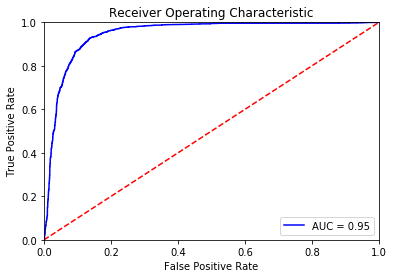

In [11]:
# calculate the fpr and tpr for all thresholds of the classification
probs = longliner_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

print evaluate_threshold(0.5)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area Under Curve: 0.96


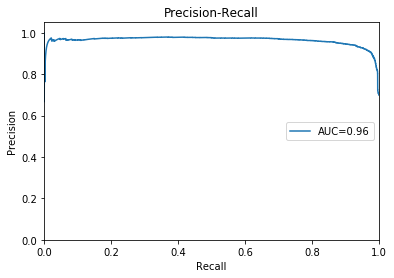

In [12]:
# Compute Precision-Recall and plot curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds)
area = metrics.auc(recall, precision)
print "Area Under Curve: %0.2f" % area

pl.clf()
pl.plot(recall, precision, label='AUC=%0.2f' % area)
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.ylim([0.0, 1.05])
pl.xlim([0.0, 1.0])
pl.title('Precision-Recall' )
pl.legend(loc="center right")
pl.show()

In [13]:
# define a function that accepts a threshold and prints sensitivity and specificity
#def evaluate_threshold(threshold):
#    print('Sensitivity:', tpr[thresholds > threshold][-1])
#    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

#for t in range(0,100):
#    print 0.005*t
#    evaluate_threshold(0.005*t)

In [14]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[3108  782]
 [ 329 8678]]
             precision    recall  f1-score   support

        0.0       0.90      0.80      0.85      3890
        1.0       0.92      0.96      0.94      9007

avg / total       0.91      0.91      0.91     12897



In [15]:
# evaluate the model using 10-fold cross-validation
scores = model_selection.cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.91488372  0.89302326  0.91812049  0.81484066  0.89904629  0.9753431
  0.98278669  0.91765527  0.90693346  0.83946021]
0.906209315811


In [16]:
#cross_val_score(LogisticRegression(), X, y, cv=10, scoring='roc_auc').mean()